<a href="https://colab.research.google.com/github/ijaysingh/ShapeAI_Python_Data_Analytics/blob/main/Titanic_Survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TITANIC SURVIVOR ANALYSIS

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

##Reading Data Using Pandas
By using Pandas *read_csv* function to read the data from csv file.

In [128]:
df = pd.DataFrame(pd.read_csv('/content/train.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
df.shape

(891, 12)

##Handeling Null Values
The dataframe may contain many rows and columns for which some values are missing, we can not leave those missing values as it is.
1. Either drop the missing values.
2. Or fill it some approproate values.

In [130]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Seperating out the column that have more than 35% of values missing in the dataset.

In [131]:
drop_col = df.isnull().sum()[df.isnull().sum()>(35 / 100 * df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [132]:
drop_col.index

Index(['Cabin'], dtype='object')

In [133]:
df.drop(drop_col.index, axis = 1, inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [134]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [135]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [136]:
df['Embarked'].fillna('S', inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

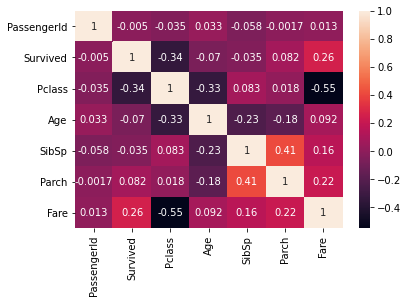

In [137]:
corrMat = df.corr()
sb.heatmap(corrMat, annot=True)
plt.show()

SibSp: Num of Siblings
Parch: Num of Parants

So we can make a new column Family_size by combining these columns

In [138]:
df['Family_size'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


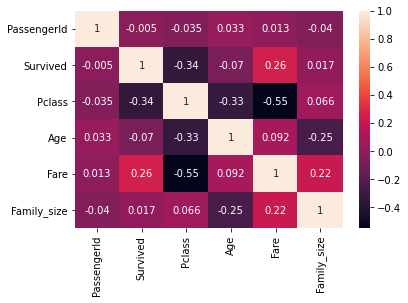

In [139]:
corrMat = df.corr()
sb.heatmap(corrMat, annot=True)
plt.show()

FamilySize in ship  does not have much correlance with survival rate.

Let's check if whether the person was alone or not can affect the survival rate.

In [140]:
df['Alone'] = [0 if df['Family_size'][i] > 0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


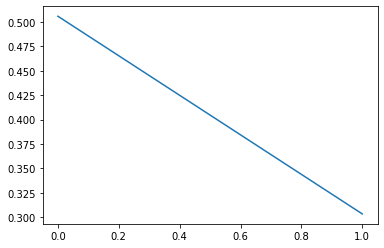

In [145]:
plt.plot(df.groupby(['Alone'])['Survived'].mean())
plt.show()

If the person was alone then he/she had less chances for surviving.

> The reason might be the person who is travelling with his family might be belonging to rich class and might be priorotized over other.





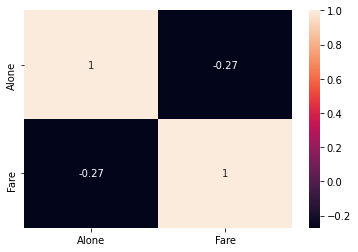

In [142]:
corrMat = df[['Alone', 'Fare']].corr()
sb.heatmap(corrMat, annot=True)
plt.show()

So we can see that if the person was not alone, the chance of ticket price is higher is high

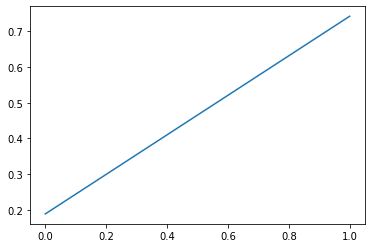

In [143]:
df['Sex'] = [0 if df['Sex'][i] == 'male' else 1 for i in df.index]
plt.plot(df.groupby(['Sex'])['Survived'].mean())
plt.show()

Now we can see that female passenges have more possibility to survive than male passengers.

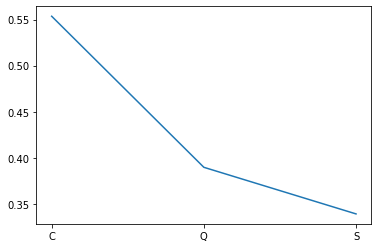

In [144]:
plt.plot(df.groupby(['Embarked'])['Survived'].mean())
plt.show()

#**Conclusion**


1. Female passengers were prioritized over male.
2. People with high class or rich people have higher survuval rate than others.
3. Passengers travelling with their family have higher survival rate.
4. Passengers who have borded the ship at Cherbourg, survived more in propertion than the others.


